In [12]:
in_file =r'../../data/clean/articles.csv' 

import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(in_file,index_col=False)
df.CR.fillna('',inplace=True)
df_ref=df.CR
refs_dict={}
i=0
for ref in df_ref:
    refs_dict[i]=[ref for ref in ref.split('; ')]
    i=i+1

In [3]:
refs_basket_dict={}
sources=[
    'MIS QUART',
    'J MANAGE INFORM SYST',
    'INFORM SYST RES'
]
sources=[', '+source+',' for source in sources]

for i in refs_dict:
    refs=refs_dict[i]
    refs_basket=[]
    for ref in refs:
        if any (source in ref for source in sources):
            refs_basket.append(ref)
    refs_basket_dict[i]=refs_basket

In [5]:
cite = open('cite_basket.csv', 'w')
cite.write('citing,cited\n')

for row in refs_basket_dict:
    for ref in refs_basket_dict[row]:
        if ref in df.signiture.values:
            cite.write(str(row)+','+str(np.where(df.signiture==ref)[0][0])+'\n')
cite.close()

In [6]:
df=pd.read_csv('cite_basket.csv',dtype=int)

In [7]:
max=np.max([df.citing.max(),df.cited.max()])
mm=np.zeros((max+1,max+1))
for row in df.iterrows():
    mm[row[1][0],row[1][1]]=1
#coc=np.tril(np.dot(mm.transpose(),mm),-1)

In [93]:
coc = 1-pairwise_distances(mm.transpose(), metric="jaccard")
coc = np.tril(coc,-1)
coc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08333333,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07142857,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
cocite = open('cocite.csv', 'w')
cocite.write('source,target,weight,type\n')

for row in range(coc.shape[0]):
    for col in range(row):
        if coc[row][col] > -1:
            cocite.write(str(row)+','+str(col)+','+str(coc[row][col])+',undirected\n')
cocite.close()

In [107]:
df=pd.read_csv('cocite.csv')
df

,source,target,weight,type
0,1,0,0.083333,undirected
1,2,0,0.000000,undirected
2,2,1,0.000000,undirected
3,3,0,0.000000,undirected
4,3,1,0.000000,undirected
5,3,2,0.000000,undirected
6,4,0,0.000000,undirected
7,4,1,0.000000,undirected
8,4,2,0.000000,undirected
9,4,3,0.000000,undirected


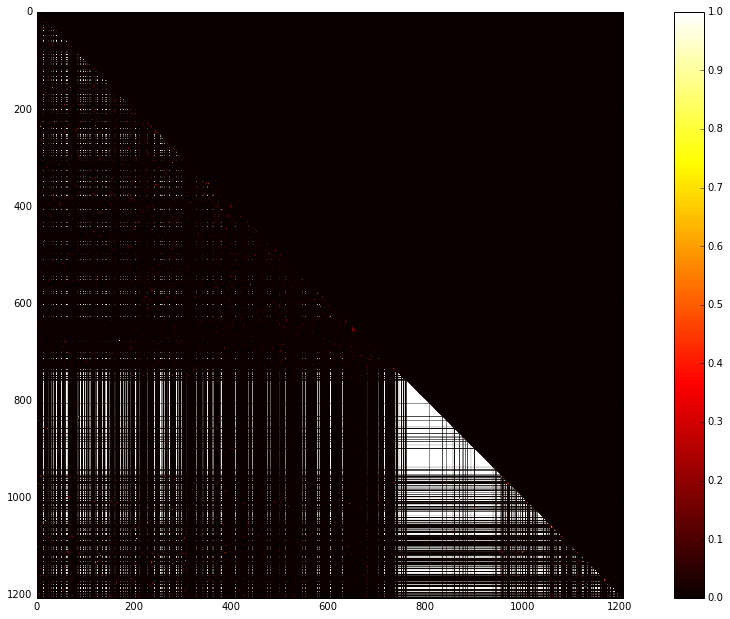

In [108]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.imshow(coc, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

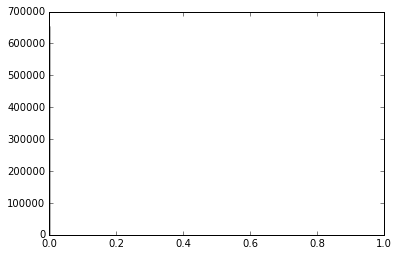

In [137]:
import numpy as np
l=df.weight
hist=plt.hist(l,1001)

In [138]:
cdf=np.cumsum(hist[0]/len(l))

In [140]:
df['p']=df.weight*1000
df['p']=df.p.round()

In [141]:
df['p']=df.p.apply(lambda x :1- cdf[x])
df

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


,source,target,weight,type,p
0,1,0,0.083333,undirected,0.009539
1,2,0,0.000000,undirected,0.018690
2,2,1,0.000000,undirected,0.018690
3,3,0,0.000000,undirected,0.018690
4,3,1,0.000000,undirected,0.018690
5,3,2,0.000000,undirected,0.018690
6,4,0,0.000000,undirected,0.018690
7,4,1,0.000000,undirected,0.018690
8,4,2,0.000000,undirected,0.018690
9,4,3,0.000000,undirected,0.018690


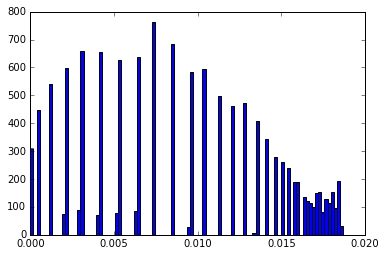

In [144]:
l=df[df.weight>0].p
binwidth=.01
hist=plt.hist(l,100 )